## 데이터 파일: US_Presidents.txt

## 연습문제 1 불러오기

In [6]:
import pandas as pd
Presidents = pd.read_csv('US_Presidents.txt',sep='\t', index_col=0)

In [7]:
Presidents

,President,Party
Years,,
1789,George Washington,None
1790,George Washington,None
1791,George Washington,None
1792,George Washington,None
1793,George Washington,None
...,...,...
2016,Barack Obama,Democrat
2017,Donald Trump,Republican
2018,Donald Trump,Republican


## 연습문제 2 
- 데이터프레임 Presidents의 Party 컬럼으로부터 오른쪽의 정당별 빈도를 값으로 하는 변수 Party를 만드시오.

In [8]:
Party = Presidents.Party.value_counts()
Party

Republican               93
Democrat                 88
Democratic-Republican    28
Whig                      9
None                      8
National Union            4
Federalist                4
Name: Party, dtype: int64

## Pie chart

<AxesSubplot:ylabel='Party'>

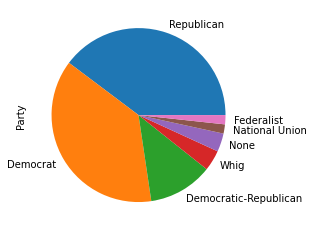

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
Party.plot(kind = 'pie')

- 범주형 : 빈도 및 비율 확인 내림차순이 보기 좋음

Text(0, 0.5, 'Party')

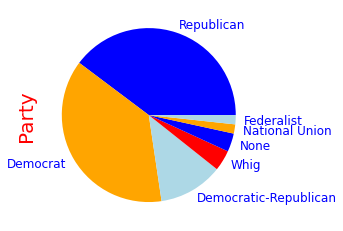

In [11]:
Party.plot.pie(textprops={'fontsize':12, 'color':'blue'},
              colors = ['blue','orange','lightblue','red'])
plt.ylabel(Party.name, fontsize=20,color='red')

<AxesSubplot:ylabel='Party'>

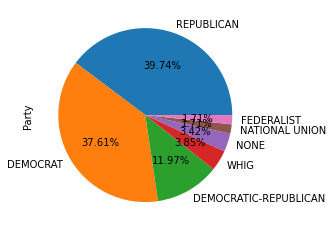

In [12]:
Party.plot.pie(labels = [i.upper() for i in Party.index], autopct = '%0.2f%%')

## bar plot

<AxesSubplot:>

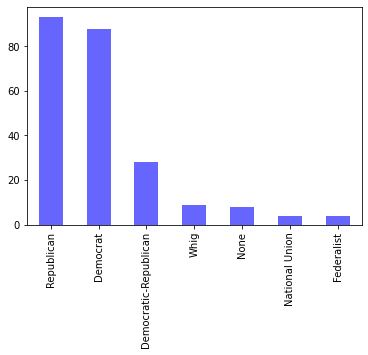

In [14]:
Party.plot(kind = 'bar', color ='blue', alpha = 0.6) # alpha 투명도
# Party.plot.bar(color='blue',alpha=0.6) 같음

빈도 내림차순이 바람직함...

## 연습문제 3
- Series Party의 값을 상대빈도로 변환하여 다음의 bar plot을 생성하시오.

<AxesSubplot:>

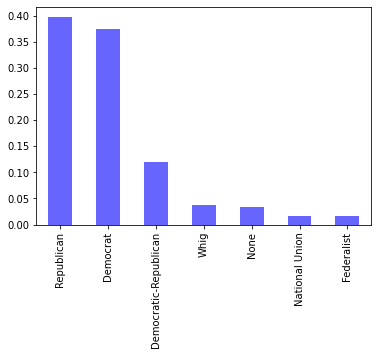

In [15]:
Party.apply(lambda x : x / Party.sum()).plot(kind='bar', color='blue', alpha=0.6)

## 연습문제 4
- TDM.txt를 불러와서 어휘의 컬럼별 상대빈도로 변환하여 df 만들기

In [17]:
TDM = pd.read_csv('TDM.txt', sep='\t', index_col = 0)
TDM = TDM.div(TDM.sum(0), axis=1)
TDM

,01.txt,02.txt,03.txt,04.txt
14th,0.000000,0.000000,0.000000,0.008333
15,0.000000,0.000000,0.000000,0.008333
1656,0.000000,0.000000,0.000000,0.008333
1761,0.000000,0.000000,0.000000,0.008333
17th,0.000000,0.000000,0.000000,0.008333
...,...,...,...,...
years,0.023529,0.000000,0.000000,0.000000
york,0.000000,0.000000,0.007937,0.000000
you,0.047059,0.000000,0.000000,0.000000
young,0.000000,0.011494,0.000000,0.000000


## 연습문제 5
- 데이터프레임 TDM으로부터 어휘 상대 빈도 합계 상위 10개로 구성되는 데이터 프레임 Top10 만들기

In [19]:
# sum(1) 행으로 합계 series
TDM.sum(1).sort_values(ascending=False) #내림차순

to                 0.233498
the                0.170430
in                 0.112265
and                0.096121
is                 0.085930
                     ...   
something          0.007937
straightforward    0.007937
such               0.007937
technical          0.007937
same               0.007937
Length: 244, dtype: float64

In [20]:
Top10 = TDM.loc[TDM.sum(1).sort_values(ascending=False).index[:10]]
Top10

,01.txt,02.txt,03.txt,04.txt
to,0.047059,0.057471,0.087302,0.041667
the,0.047059,0.034483,0.055556,0.033333
in,0.035294,0.011494,0.023810,0.041667
and,0.023529,0.022989,0.007937,0.041667
is,0.011765,0.034483,0.039683,0.000000
a,0.011765,0.022989,0.015873,0.025000
of,0.023529,0.011494,0.031746,0.008333
as,0.023529,0.022989,0.015873,0.000000
your,0.058824,0.000000,0.000000,0.000000
it,0.011765,0.000000,0.031746,0.008333


## bar plot

<AxesSubplot:>

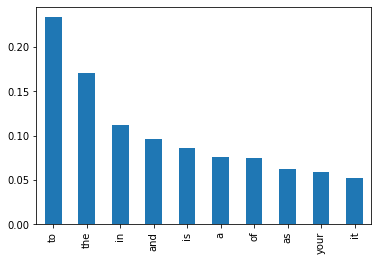

In [21]:
Top10.sum(1).plot.bar()

- 상대빈도 합계 값이 to가 가장 많이 사용됨 , 
- 정렬이 왜 중요? 어떠한 어휘가 가장 많이 사용되고 2순위와의 간격등을 손쉽게 파악 가능

<AxesSubplot:>

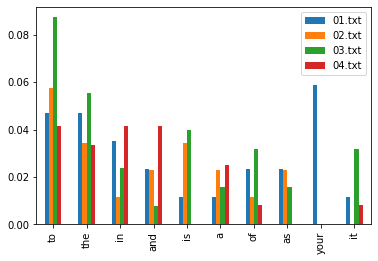

In [22]:
Top10.plot.bar()

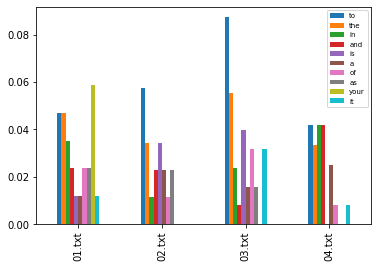

In [24]:
Top10.T.plot.bar()
plt.legend(loc='upper right', fontsize='x-small') #범례 오른쪽 상단, 폰트 크기 매우 작음

<AxesSubplot:>

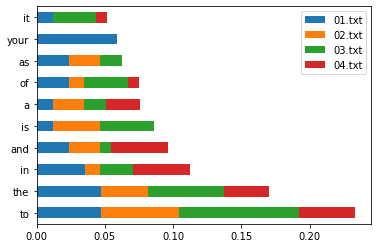

In [25]:
Top10.plot.barh(stacked=True)

가장 오른쪽 끝의 합산된 결과가 1로 표준화되면 비교하기가 편함 

## 연습문제 6
- Top10의 stacked bar를 다음과 같이 출력하려면 어떻게 해야 할까?

In [27]:
Top10

,01.txt,02.txt,03.txt,04.txt
to,0.047059,0.057471,0.087302,0.041667
the,0.047059,0.034483,0.055556,0.033333
in,0.035294,0.011494,0.023810,0.041667
and,0.023529,0.022989,0.007937,0.041667
is,0.011765,0.034483,0.039683,0.000000
a,0.011765,0.022989,0.015873,0.025000
of,0.023529,0.011494,0.031746,0.008333
as,0.023529,0.022989,0.015873,0.000000
your,0.058824,0.000000,0.000000,0.000000
it,0.011765,0.000000,0.031746,0.008333


<AxesSubplot:>

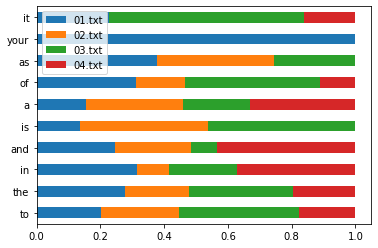

In [28]:
Top10.div(Top10.sum(1), axis=0).plot.barh(stacked=True)

<AxesSubplot:>

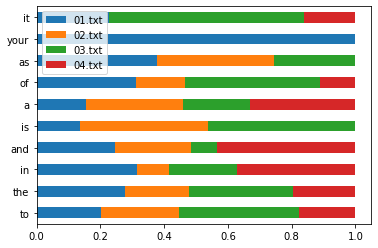

In [29]:
Top10.T.div(Top10.sum(1)).T.plot.barh(stacked=True) # 같음